In [171]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

In [152]:
spotify=pd.read_csv('C:/Users/Administrator/Desktop/top50.csv', encoding='latin-1')
spotify.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [153]:
spotify.columns=['number','Track_name','Artist_name','Genre','Beats_per_minute','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness','Speechiness','Popularity']

In [154]:
spotify.shape

(50, 14)

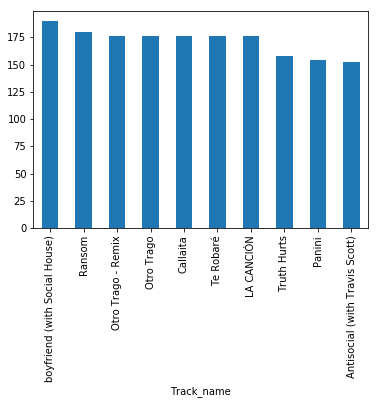

In [155]:
spotify.groupby('Track_name')['Beats_per_minute'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

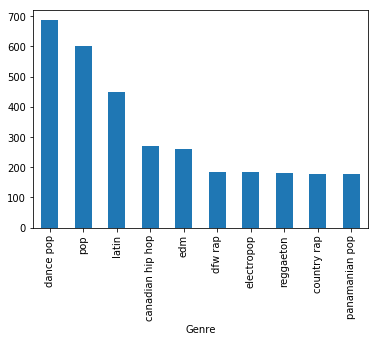

In [156]:
spotify.groupby('Genre')['Popularity'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [157]:
spotify.groupby('Artist_name')['number'].count().sort_values(ascending=False)


Artist_name
Ed Sheeran          4
The Chainsmokers    2
Ariana Grande       2
Shawn Mendes        2
Sech                2
Billie Eilish       2
Post Malone         2
Lil Nas X           2
Marshmello          2
J Balvin            2
Young Thug          1
Katy Perry          1
Jonas Brothers      1
Jhay Cortez         1
DJ Snake            1
Drake               1
Daddy Yankee        1
Kygo                1
Chris Brown         1
Bad Bunny           1
Anuel AA            1
Khalid              1
Lewis Capaldi       1
Lady Gaga           1
Lauv                1
Y2K                 1
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Martin Garrix       1
Nicky Jam           1
ROSALÍA             1
Sam Smith           1
Taylor Swift        1
Tones and I         1
Ali Gatie           1
Name: number, dtype: int64

In [158]:
spotify.skew()

number              0.000000
Beats_per_minute    0.854504
Energy             -0.453199
Danceability       -1.379891
Loudness           -0.831915
Liveness            2.203937
Valence            -0.046490
Length              0.748554
Acousticness        1.135290
Speechiness         1.377581
Popularity         -1.503434
dtype: float64

In [159]:
np.log(spotify['Liveness']).skew()

0.9759266681438983

In [160]:
sq=np.asarray(spotify['Liveness'].values)
skew_live=stats.boxcox(sq)[0]

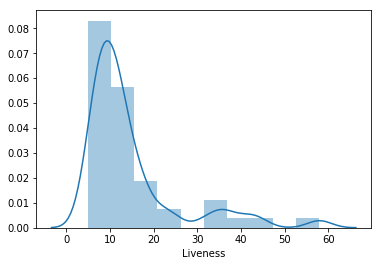

In [161]:
sns.distplot(spotify['Liveness'],bins=10)

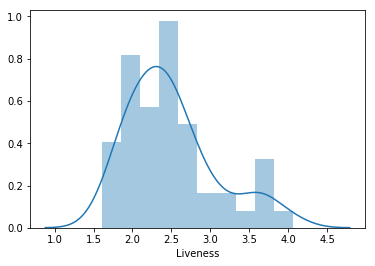

In [162]:
sns.distplot(np.log(spotify['Liveness']),bins=10)

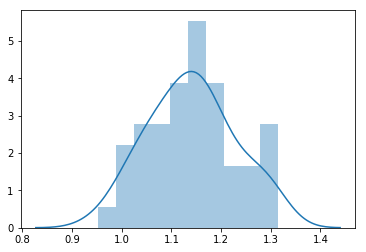

In [163]:
sns.distplot(skew_live,bins=10)

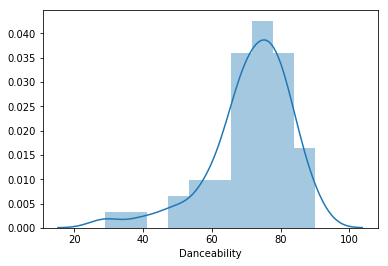

In [164]:
sns.distplot(spotify['Danceability'],bins=10)

In [165]:
qa=np.asarray(spotify['Danceability'].values)
skew_dance=stats.boxcox(qa)[0]
pd.Series(skew_dance).skew()

-0.12038020980250373

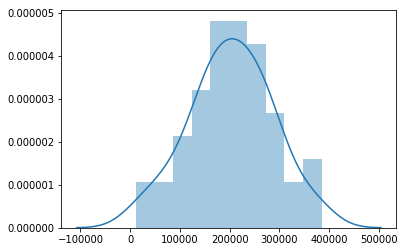

In [134]:
sns.distplot(skew_dance,bins=10)

In [135]:
correlation=spotify.corr()

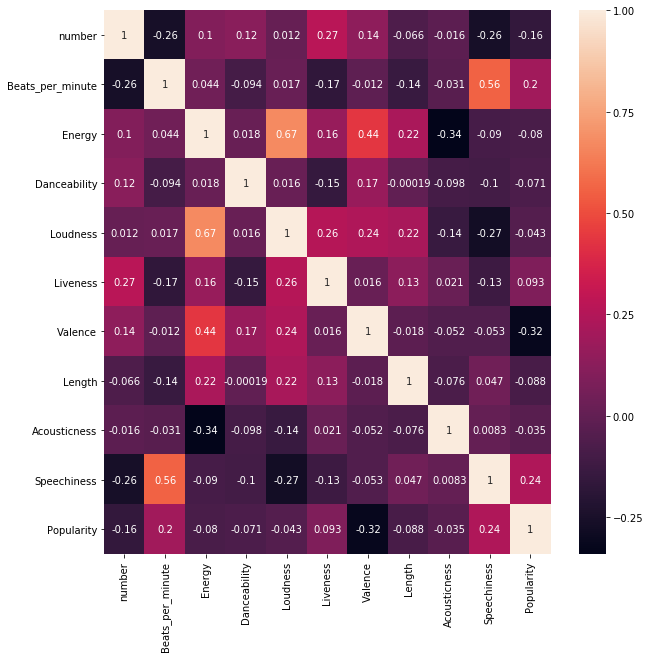

In [137]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

In [138]:
numeric_data=spotify[['Beats_per_minute','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness']]

<Figure size 720x720 with 0 Axes>

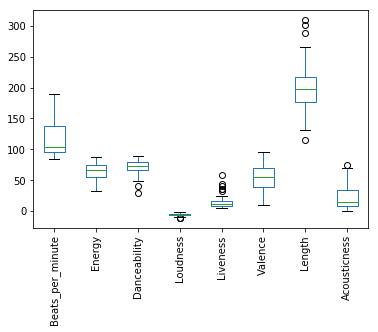

<Figure size 720x720 with 0 Axes>

In [139]:
numeric_data.plot(kind='box')
plt.xticks(rotation=90)
plt.figure(figsize=(10,10))

In [140]:
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

updated_data=numeric_data.apply(lambda x:outlier_capping(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


<Figure size 720x720 with 0 Axes>

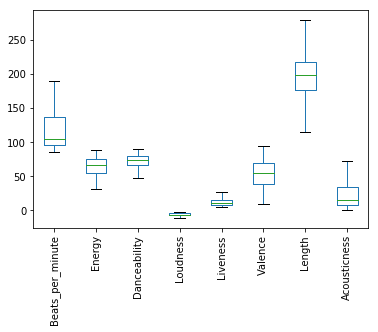

<Figure size 720x720 with 0 Axes>

In [141]:
updated_data.plot(kind='box')
plt.xticks(rotation=90)
plt.figure(figsize=(10,10))

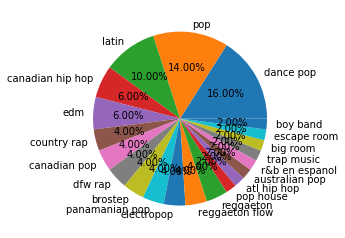

<Figure size 1440x1440 with 0 Axes>

In [142]:
pie=spotify['Genre'].value_counts()
label=spotify['Genre'].value_counts().index
plt.pie(pie,labels=label,autopct='%.2f%%')
plt.figure(figsize=(20,20))
plt.show()

In [143]:
spotify['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [77]:
sc=StandardScaler()
sc_data=sc.fit_transform(numeric_data)
sc_data=pd.DataFrame(sc_data)
sc_data.head()

,0,1,2,3,4,5,6,7
0,-0.100040,-0.643061,0.391195,-0.167012,-0.605094,0.922595,-0.257029,-0.965719
1,-0.492352,1.202367,0.645217,0.815412,-0.605094,0.289442,2.607453,-0.753006
2,2.286529,1.131389,-2.657075,0.815412,0.121746,0.696469,-0.386060,-0.540292
3,-0.884665,0.066719,-0.624895,-1.149437,-0.605094,0.018090,-0.076386,-0.540292
4,0.978820,0.066719,-1.132940,0.815412,-0.332529,-1.655245,-0.669927,1.214594


In [36]:
sc_data.columns=numeric_data.columns

In [38]:
sc_data.skew()

Beats_per_minute    0.854504
Energy             -0.453199
Danceability       -1.379891
Loudness           -0.831915
Liveness            2.203937
Valence            -0.046490
Length              0.748554
Acousticness        1.135290
Speechiness         1.377581
dtype: float64

In [44]:
sc_data.corr()

,Beats_per_minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness
Beats_per_minute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472
Loudness,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286
Valence,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242
Length,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755
Acousticness,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293
Speechiness,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000


In [45]:
x=sc_data
y=spotify['Popularity']

In [87]:
spotify['Artist_name'].nunique()

38

In [88]:
spotify['Track_name'].nunique()

50

In [89]:
spotify['Genre'].nunique()

21

In [91]:
x=spotify[['Artist_name','Genre','Beats_per_minute','Energy','Danceability','Loudness','Liveness','Valence','Length','Acousticness']]
x.head()

,Artist_name,Genre,Beats_per_minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness
0,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4
1,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8
2,Ariana Grande,dance pop,190,80,40,-4,16,70,186,12
3,Ed Sheeran,pop,93,65,64,-8,8,55,198,12
4,Post Malone,dfw rap,150,65,58,-4,11,18,175,45


In [94]:
x=pd.get_dummies(x)
x.shape

(50, 67)

In [144]:
x_train,x_test,y_train,y_test=train_test_split(updated_data,y,test_size=0.20,random_state=0)

In [145]:
len(x_train)

40

In [146]:
len(x_test)

10

In [147]:
import statsmodels.formula.api as smf
model=smf.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     584.6
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           1.97e-32
Time:                        12:26:05   Log-Likelihood:                -135.79
No. Observations:                  40   AIC:                             287.6
Df Residuals:                      32   BIC:                             301.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Beats_per_minute     0.1232      0.044      2.792      0.009       0.033       0.213
Energy               0.3012      0.119      2.534      0.016       0.059       0.543
Danceability         0.3357      0.110      3.050      0.005       0.112       0.560
Loudness            -2.3319      0.656     -3.555      0.001      -3.668      -0.996
Liveness             0.3402      0.194      1.751      0.089      -0.056       0.736
Valence             -0.0793      0.071     -1.119      0.271      -0.224       0.065
Length               0.0669      0.034      1.986      0.056      -0.002       0.135
Acousticness         0.1087      0.077      1.413      0.167      -0.048       0.265
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.268
Skew:                          -0.154   Prob(JB):                        0.875
Kurtosis:                       2.743   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
reg=LinearRegression()
reg1=reg.fit(x_train,y_train)
print('Coefficicents:',reg1.coef_)
print('intercept:',reg1.intercept_)

Coefficicents: [ 0.03644613 -0.00212071 -0.01041468 -0.02957912  0.10396512 -0.03965937
 -0.01142713 -0.03612045]
intercept: 87.63224518339342


In [149]:
y_pred=reg1.predict(x_test)
y_pred

array([85.5973637 , 87.17184606, 89.93578301, 85.80396547, 90.33546252,
       87.09883154, 86.94324687, 87.62653371, 85.03835412, 89.28016425])

In [166]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print('RMSE=',rmse)


RMSE= 4.076349583686365


In [173]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
28      91         89
11      86         88
10      93         88
41      90         91
2       85         87
27      89         88
38      80         87
31      89         88
22      83         92
4       94         88


In [175]:
# Linear SVM model 
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(x_train, y_train)
y_pred=LinSVC.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
28      91         92
11      86         82
10      93         90
41      90         79
2       85         90
27      89         95
38      80         79
31      89         95
22      83         82
4       94         90


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
